In [1]:
#Import libraries
import pandas as pd
import numpy as np

import warnings
from google.colab import auth
import gspread
from google.auth import default
warnings.filterwarnings ("ignore")

In [3]:
#Load data from gsheet

auth.authenticate_user()
creds,_ = default()

gc = gspread.authorize(creds)
wb = gc.open_by_key("1hjhyA_HoMKfSsfxjK3IoCt_ACbEyElMZYL9T9GdU0hk")

In [10]:
#Create function to open the sheet

def work_sheet(x):
  ws = wb.worksheet(x)
  rows = ws.get_all_values()
  data = pd.DataFrame(rows)
  data.columns = data.iloc[0]
  data = data.iloc[1:]

  return data

In [11]:
df = work_sheet("Sheet1")
df.head(5)

# #Retain certain data

# df = daily_data.iloc[]

df.shape

(90, 8)

In [12]:
import pandas as pd

In [13]:
# df = pd.read_csv('maxbill data.csv')
# # print(df.shape)
# # print(df.isna().sum())
df.head()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours,Billed_Hours,Headcount,Is_Holiday
1,05/01/2024,01/01/2024,8126,1129,3123.72,3123.72,1171,FALSE
2,05/01/2024,02/01/2024,8095,1138,2950.93,2950.93,1108,FALSE
3,05/01/2024,03/01/2024,7466,1024,6734.52,6734.52,1048,FALSE
4,05/01/2024,04/01/2024,8123,1053,5985.39,5985.39,1026,FALSE
5,05/01/2024,05/01/2024,8332,951,7271.03,7271.03,988,FALSE


In [14]:
## Checking the data size, nulls and data types, unique values and Duplicates

print(df.shape)
print('\n')
print(df.isnull().sum())
print('\n')
print(df.dtypes)
print("\n")
print(df.nunique())
print('\n')
print(df[df.duplicated()])

(90, 8)


0
week_ending        0
Date               0
MaxBill_Hours      0
Billable_HC        0
Delivered_Hours    0
Billed_Hours       0
Headcount          0
Is_Holiday         0
dtype: int64


0
week_ending        object
Date               object
MaxBill_Hours      object
Billable_HC        object
Delivered_Hours    object
Billed_Hours       object
Headcount          object
Is_Holiday         object
dtype: object


0
week_ending        14
Date               90
MaxBill_Hours      89
Billable_HC        66
Delivered_Hours    90
Billed_Hours       90
Headcount          80
Is_Holiday          2
dtype: int64


Empty DataFrame
Columns: [week_ending, Date, MaxBill_Hours, Billable_HC, Delivered_Hours, Billed_Hours, Headcount, Is_Holiday]
Index: []


In [15]:
## Dropping null rows
df.dropna(inplace = True)
print(df.shape)
print('\n')

## Removing unecessary columns
df.drop(['Billed_Hours'],axis = 1,inplace = True)

print(df.columns)
print('\n')
print(df.dtypes)

(90, 8)


Index(['week_ending', 'Date', 'MaxBill_Hours', 'Billable_HC',
       'Delivered_Hours', 'Headcount', 'Is_Holiday'],
      dtype='object', name=0)


0
week_ending        object
Date               object
MaxBill_Hours      object
Billable_HC        object
Delivered_Hours    object
Headcount          object
Is_Holiday         object
dtype: object


In [18]:
## Change date into a datetime object
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

print(df.dtypes)



0
week_ending                object
Date               datetime64[ns]
MaxBill_Hours              object
Billable_HC                object
Delivered_Hours            object
Headcount                  object
Is_Holiday                 object
dtype: object


In [19]:
#Change datatypes from string to numeric

columns_to_convert = {'MaxBill_Hours': float,
                   'Billable_HC': float,
                   'Delivered_Hours': float,
                   'Headcount': float}
df = df.astype(columns_to_convert)
df.dtypes

,0
0,
week_ending,object
Date,datetime64[ns]
MaxBill_Hours,float64
Billable_HC,float64
Delivered_Hours,float64
Headcount,float64
Is_Holiday,object


In [20]:
## Sort values by date in asc order

df.sort_values('Date',inplace = True)

In [21]:
## Removing holidays from the data
# Get dayName from data
df['dayofweek'] = df['Date'].dt.day_name()
df.head()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours,Headcount,Is_Holiday,dayofweek
1,05/01/2024,2024-01-01,8126.0,1129.0,3123.72,1171.0,FALSE,Monday
2,05/01/2024,2024-01-02,8095.0,1138.0,2950.93,1108.0,FALSE,Tuesday
3,05/01/2024,2024-01-03,7466.0,1024.0,6734.52,1048.0,FALSE,Wednesday
4,05/01/2024,2024-01-04,8123.0,1053.0,5985.39,1026.0,FALSE,Thursday
5,05/01/2024,2024-01-05,8332.0,951.0,7271.03,988.0,FALSE,Friday


In [22]:
df.dayofweek.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [24]:
#Convert 'weekend_date' to datetime type
df['week_ending'] = pd.to_datetime(df['week_ending'], dayfirst=True)

# Filter data for Sunday and Friday
filtered_df = df[df['dayofweek'].isin(['Sunday', 'Friday'])]

# Group by 'weekend_date' and sum 'delivered_hrs'
result = filtered_df.groupby('week_ending')['Delivered_Hours'].sum().reset_index()

# #Merge the result back into the original DataFrame
# df = pd.merge(df, result, how='left', on='date', suffixes=('', '_weekend'))

# print(df)

In [25]:
result.head()

,week_ending,Delivered_Hours
0,2024-01-05,7271.03
1,2024-01-12,4410.98
2,2024-01-19,7898.14
3,2024-01-26,7403.75
4,2024-02-02,12071.68


In [26]:
result.rename(columns = {'week_ending' : 'Date'}, inplace = True)

In [27]:
#Drop the Entries of Friday and Sunday from the data
df.drop(df[(df["dayofweek"] == 'Friday') & (df["dayofweek"] == 'Sunday')].index,inplace=True)

In [28]:
# Merge the result back into the original DataFrame
df = pd.merge(df, result, how='left', on='Date')

In [29]:
df.tail()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours_x,Headcount,Is_Holiday,dayofweek,Delivered_Hours_y
85,2024-03-29,2024-03-26,7565.0,1007.0,5172.39,1023.0,FALSE,Tuesday,NaN
86,2024-03-29,2024-03-27,7625.0,981.0,7569.05,977.0,FALSE,Wednesday,NaN
87,2024-03-29,2024-03-28,7961.0,1076.0,3760.23,1052.0,FALSE,Thursday,NaN
88,2024-03-29,2024-03-29,7784.0,1053.0,2790.22,1035.0,FALSE,Friday,6532.39
89,2024-04-05,2024-03-30,7245.0,1125.0,3539.89,1113.0,FALSE,Saturday,NaN


In [30]:
# Replace values in column A with values from column B where B is not null
df['Delivered_Hours_x'] = df.apply(lambda row: row['Delivered_Hours_y'] if pd.notnull(row['Delivered_Hours_y']) else row['Delivered_Hours_x'], axis=1)

# Display the modified DataFrame
df.tail()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours_x,Headcount,Is_Holiday,dayofweek,Delivered_Hours_y
85,2024-03-29,2024-03-26,7565.0,1007.0,5172.39,1023.0,FALSE,Tuesday,NaN
86,2024-03-29,2024-03-27,7625.0,981.0,7569.05,977.0,FALSE,Wednesday,NaN
87,2024-03-29,2024-03-28,7961.0,1076.0,3760.23,1052.0,FALSE,Thursday,NaN
88,2024-03-29,2024-03-29,7784.0,1053.0,6532.39,1035.0,FALSE,Friday,6532.39
89,2024-04-05,2024-03-30,7245.0,1125.0,3539.89,1113.0,FALSE,Saturday,NaN


In [31]:
#Rename col Delivered_Hours_x and drop col Delivered_Hours_y

df.rename(columns = {'Delivered_Hours_x' : 'Delivered_Hours'}, inplace = True)

df.drop(['Delivered_Hours_y'], axis = 1, inplace= True)

In [32]:
df.tail()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours,Headcount,Is_Holiday,dayofweek
85,2024-03-29,2024-03-26,7565.0,1007.0,5172.39,1023.0,FALSE,Tuesday
86,2024-03-29,2024-03-27,7625.0,981.0,7569.05,977.0,FALSE,Wednesday
87,2024-03-29,2024-03-28,7961.0,1076.0,3760.23,1052.0,FALSE,Thursday
88,2024-03-29,2024-03-29,7784.0,1053.0,6532.39,1035.0,FALSE,Friday
89,2024-04-05,2024-03-30,7245.0,1125.0,3539.89,1113.0,FALSE,Saturday


In [33]:
## Drop weekend(saturday and Sunday) from data

df.drop(df[df['dayofweek'] == 'Saturday'].index, inplace = True)
df.drop(df[df['dayofweek'] == 'Sunday'].index, inplace = True)

df.head()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours,Headcount,Is_Holiday,dayofweek
0,2024-01-05,2024-01-01,8126.0,1129.0,3123.72,1171.0,FALSE,Monday
1,2024-01-05,2024-01-02,8095.0,1138.0,2950.93,1108.0,FALSE,Tuesday
2,2024-01-05,2024-01-03,7466.0,1024.0,6734.52,1048.0,FALSE,Wednesday
3,2024-01-05,2024-01-04,8123.0,1053.0,5985.39,1026.0,FALSE,Thursday
4,2024-01-05,2024-01-05,8332.0,951.0,7271.03,988.0,FALSE,Friday


In [34]:
df.dayofweek.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [35]:
# df.drop(df[(df['Headcount'] == 0) & (df['dayofweek'] == 'Saturday')].index ,inplace = True)

## linear dependence of variables

In [38]:
# Only keep numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation
correlation_matrix = numeric_df.corr(method='spearman')

# Display it
print(correlation_matrix)


                 MaxBill_Hours  Billable_HC  Delivered_Hours  Headcount  \
MaxBill_Hours         1.000000     0.113448         0.271069   0.150988   
Billable_HC           0.113448     1.000000        -0.187547   0.903787   
Delivered_Hours       0.271069    -0.187547         1.000000  -0.167530   
Headcount             0.150988     0.903787        -0.167530   1.000000   
Is_Holiday            0.087361     0.071154        -0.099840   0.082370   

                 Is_Holiday  
MaxBill_Hours      0.087361  
Billable_HC        0.071154  
Delivered_Hours   -0.099840  
Headcount          0.082370  
Is_Holiday         1.000000  


In [48]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.9 MB/s eta 0:00:00


In [49]:
## Checking relationship between delivered hors and project using Anova
## Using pingouin

import pingouin as pg

aov = pg.anova(dv='Delivered_Hours', between = 'dayofweek', data=df, detailed =True)
aov


,Source,SS,DF,MS,F,p-unc,np2
0,dayofweek,1.528088e+08,4,3.820220e+07,11.560779,5.051596e-07,0.435258
1,Within,1.982680e+08,60,3.304466e+06,NaN,NaN,NaN


In [50]:
df.head()

,week_ending,Date,MaxBill_Hours,Billable_HC,Delivered_Hours,Headcount,Is_Holiday,dayofweek
0,2024-01-05,2024-01-01,8126.0,1129.0,3123.72,1171.0,0,Monday
1,2024-01-05,2024-01-02,8095.0,1138.0,2950.93,1108.0,0,Tuesday
2,2024-01-05,2024-01-03,7466.0,1024.0,6734.52,1048.0,0,Wednesday
3,2024-01-05,2024-01-04,8123.0,1053.0,5985.39,1026.0,0,Thursday
4,2024-01-05,2024-01-05,8332.0,951.0,7271.03,988.0,0,Friday


In [51]:
## Making date the index
df.set_index('Date', inplace = True)

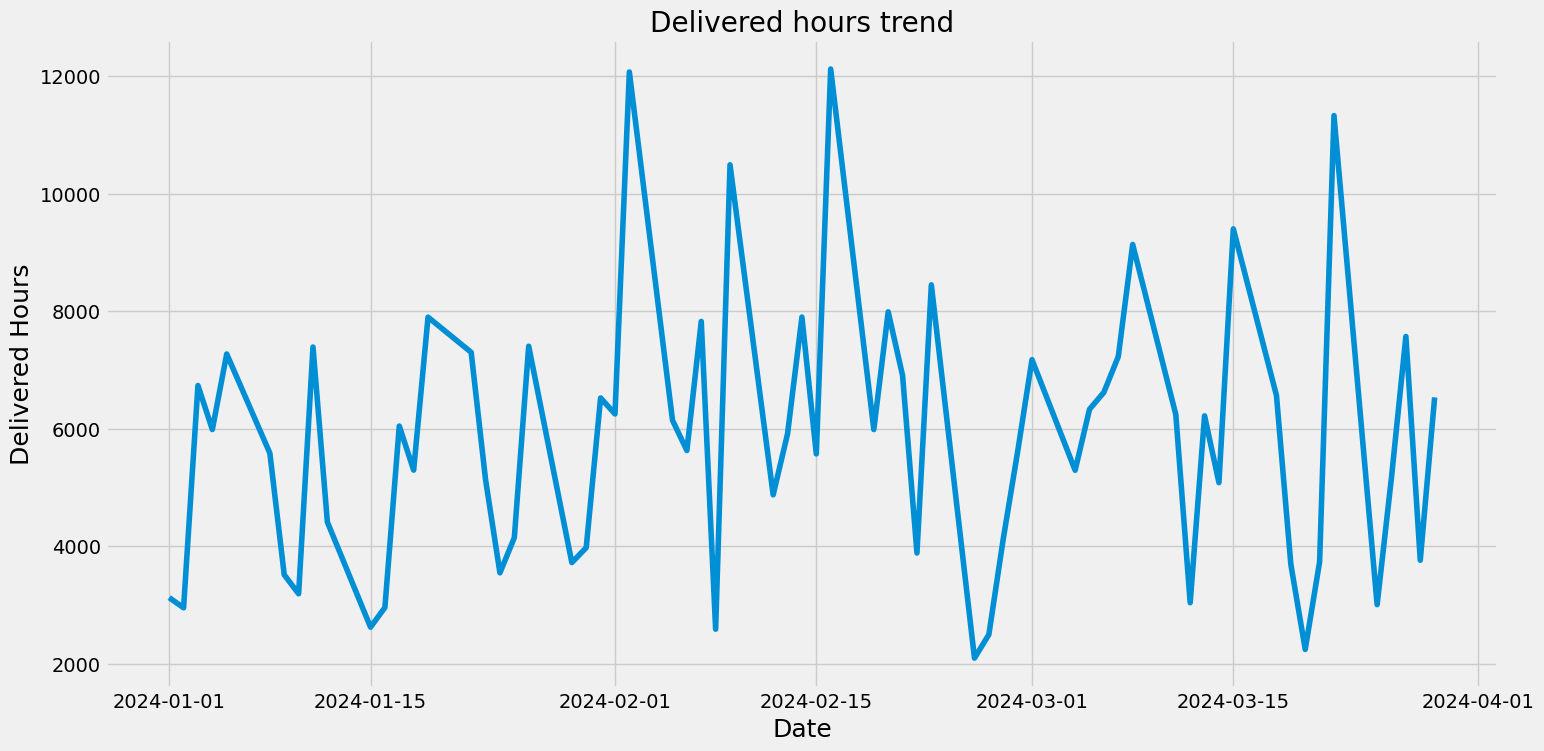

In [52]:
# Visualize the delivered hours
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Delivered hours trend')

plt.plot(df['Delivered_Hours'],)

#Label The axis
plt.xlabel('Date', fontsize=18)
plt.ylabel('Delivered Hours', fontsize=18)

plt.show()

In [53]:
# Remove Outliers
q1 = df['Delivered_Hours'].quantile(0.25)
q3 = df['Delivered_Hours'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
dfx = df.loc[(df['Delivered_Hours'] > fence_low) & (df['Delivered_Hours'] < fence_high)]


In [54]:
df.dayofweek.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

## LSTM Model

In [55]:
# pip install keras

In [56]:
# pip install tensorflow

In [57]:
# import numpy as np
print(np.__version__)


2.0.2


In [58]:
import math
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from keras.layers import Dense, LSTM
from keras.models import Sequential

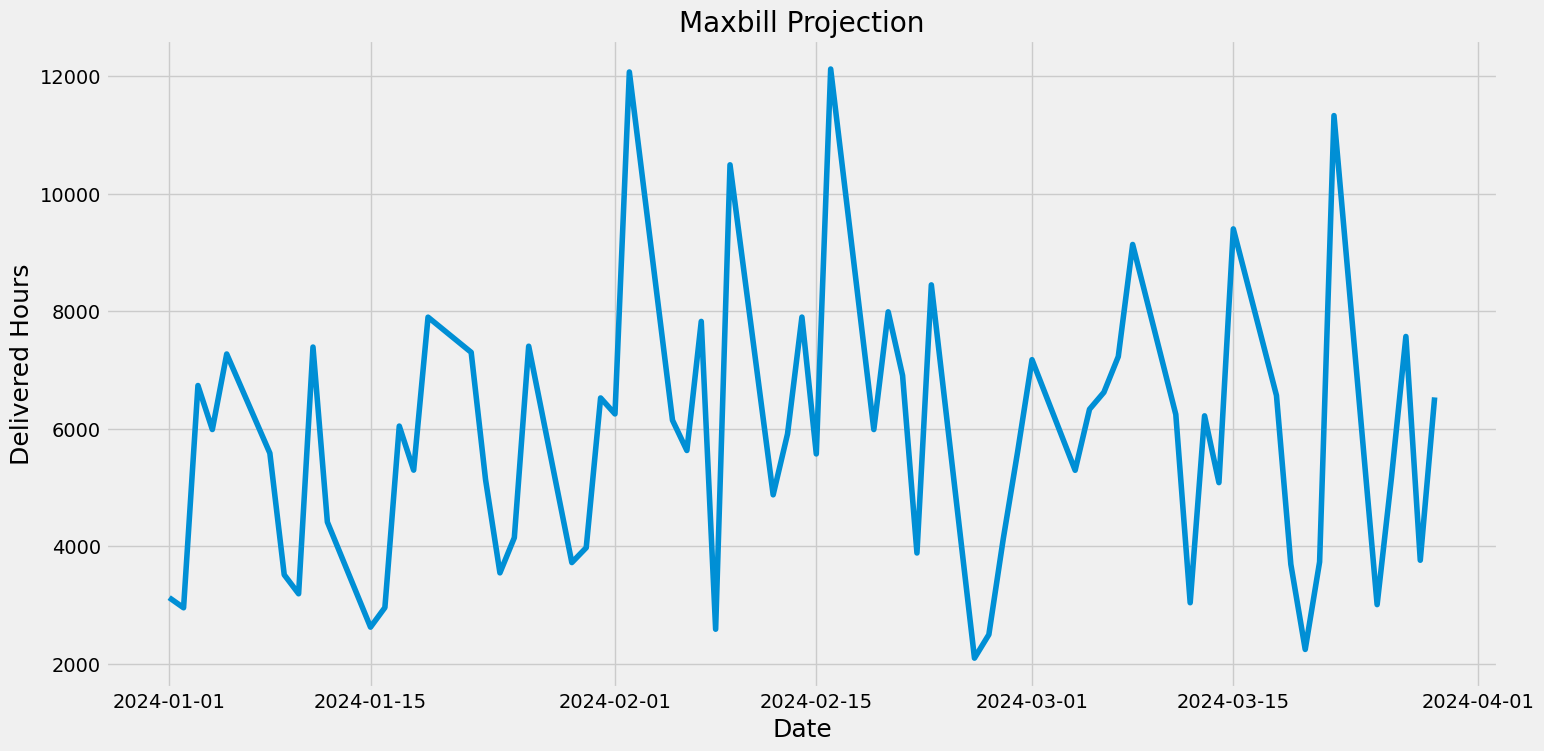

In [59]:
# Visualize the history
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Maxbill Projection')

plt.plot(df['Delivered_Hours'],)

#Label The axis
plt.xlabel('Date', fontsize=18)
plt.ylabel('Delivered Hours', fontsize=18)

plt.show()

In [60]:
## Create a new dataframe with only the 'Delivered_Hours' column
data = df.filter(['Delivered_Hours'])


In [61]:
data.tail()

,Delivered_Hours
Date,
2024-03-25,3004.58
2024-03-26,5172.39
2024-03-27,7569.05
2024-03-28,3760.23
2024-03-29,6532.39


In [62]:
#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

52

In [63]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10269775],
       [0.08546695],
       [0.46277063],
       [0.38806658],
       [0.51627199],
       [0.34794081],
       [0.14149524],
       [0.10925342],
       [0.52806101],
       [0.23106471],
       [0.05259589],
       [0.08586184],
       [0.39391522],
       [0.31911344],
       [0.57880807],
       [0.51910606],
       [0.30291475],
       [0.14474415],
       [0.20445215],
       [0.52950697],
       [0.16222625],
       [0.18750754],
       [0.44167862],
       [0.41454751],
       [0.99499799],
       [0.40382749],
       [0.35248011],
       [0.57156334],
       [0.0490887 ],
       [0.83741974],
       [0.27723557],
       [0.38063636],
       [0.57897261],
       [0.34666139],
       [1.        ],
       [0.38801273],
       [0.58784978],
       [0.47967834],
       [0.17849276],
       [0.63359085],
       [0.        ],
       [0.03999314],
       [0.2022872 ],
       [0.35024935],
       [0.50662198],
       [0.31889106],
       [0.42246237],
       [0.451

In [64]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []
#We create a loop
for i in range(5, len(train_data)):
    x_train.append(train_data[i-5:i, 0]) #Will conain 5 values (0-4)
    y_train.append(train_data[i, 0]) #Will contain the 5th value (5)
    if i <= 6:
        print(x_train)
        print(y_train)
        print()

[array([0.10269775, 0.08546695, 0.46277063, 0.38806658, 0.51627199])]
[np.float64(0.34794080955567286)]

[array([0.10269775, 0.08546695, 0.46277063, 0.38806658, 0.51627199]), array([0.08546695, 0.46277063, 0.38806658, 0.51627199, 0.34794081])]
[np.float64(0.34794080955567286), np.float64(0.14149523781981801)]



In [65]:
#Convert the x_train and y_train to numpy arrays
## So that they can be used in training the LSTM Model
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the x_train data
## Because LSTM expects input to be 3D in terms of (Samples(rows), Features(columns) and Time Steps)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(47, 5, 1)

In [66]:
## Build LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Note: An optimizer is used to improve the loss function

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0964


In [67]:
#Create the testing data set
#Create a new array containing scaled values from index 136 to 169
test_data = scaled_data[training_data_len - 5:]

#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(5, len(test_data)):
    x_test.append(test_data[i-5:i, 0])

#Now our x_test contains the past 5 values and y_test dataset has the actual values(11th value)

In [68]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [69]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
#Get the model's predicted price values for the x_test data set
predictions = model.predict(x_test)

# Unscalling the predicted values
predictions = scaler.inverse_transform(predictions)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[5215.3833],
       [5132.875 ],
       [4975.6187],
       [4812.841 ],
       [4875.576 ],
       [5078.659 ],
       [4906.9434],
       [4793.252 ],
       [4598.4346],
       [4512.6514],
       [4648.3823],
       [4969.0293],
       [5080.171 ]], dtype=float32)

In [71]:
#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

np.float64(822.895623497596)

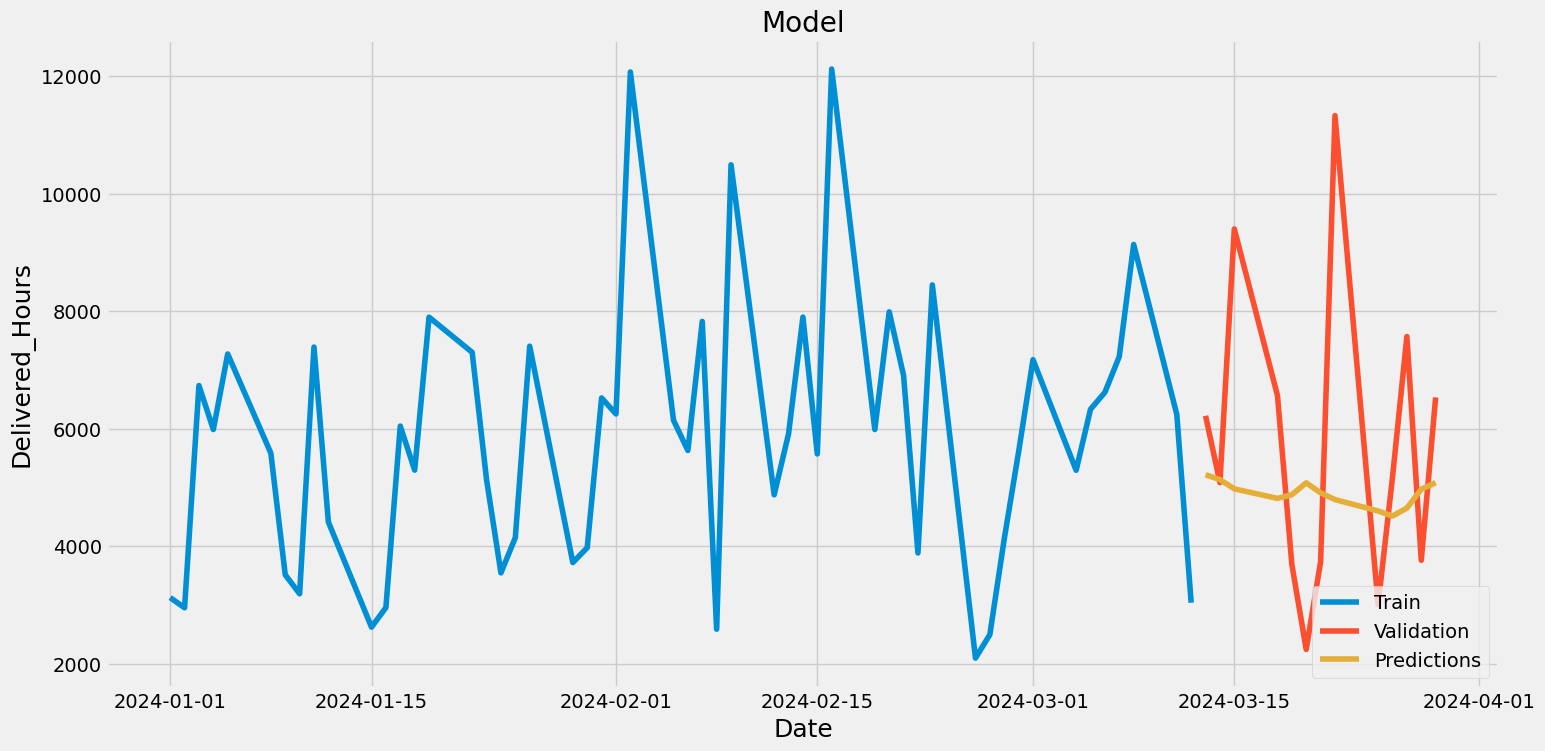

In [72]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Delivered_Hours', fontsize=18)
plt.plot(train['Delivered_Hours'])
plt.plot(valid[['Delivered_Hours', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [73]:
X_FUTURE = 65
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[[0.29779714]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.24922156]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.26351082]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.25999558]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.23773281]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.24429363]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.2403146]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.23983051]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.23806903]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.23647007]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.23648654]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.2359256]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.23562239]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.23532163]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.2351314]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.23504476]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.23494296]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.23487455]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.234822

In [74]:
import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

In [75]:
new_data.to_csv('nextprojection3.csv')